# A Simple Content Based Recommendation System on Item Similiarity

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
column_names = ['user_id','item_id','rating','timestamp']

In [25]:
df = pd.read_csv('u.data', sep = '\t', names = column_names)

In [26]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [27]:
movie_titles = pd.read_csv('Movie_Id_Titles')

In [29]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [30]:
df = pd.merge(df,movie_titles , on = 'item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [31]:
sns.set_style('white')

In [32]:
df.groupby('title')['rating'].mean().sort_values(ascending = False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [34]:
df.groupby('title')['rating'].count().sort_values(ascending = False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [36]:
df_ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
df_ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [37]:
df_ratings['no. of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
df_ratings.head()

,rating,no. of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


Data Exploration

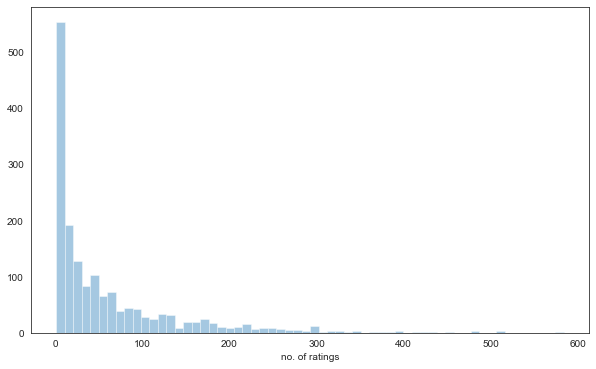

In [42]:
plt.figure(figsize = (10,6))
sns.distplot(df_ratings['no. of ratings'], bins = 60, kde = False)

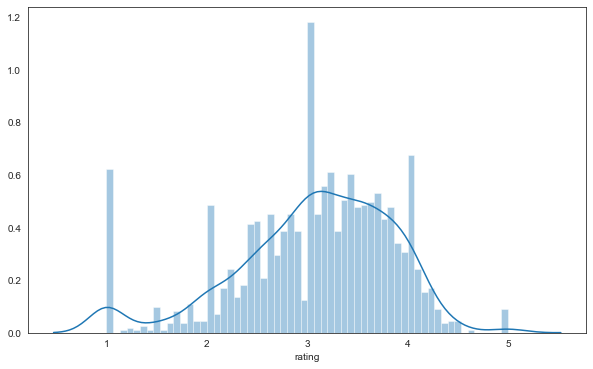

In [44]:
plt.figure(figsize = (10,6))
sns.distplot(df_ratings['rating'], bins = 60)

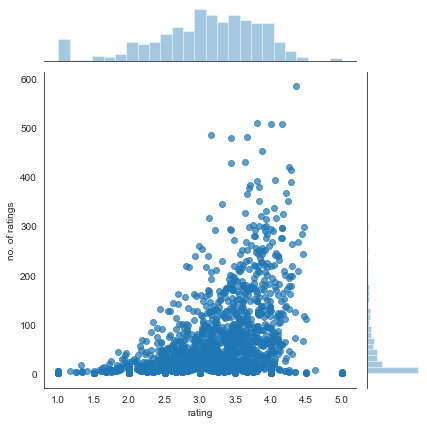

In [46]:
sns.jointplot(x = 'rating', y ='no. of ratings', data = df_ratings, alpha = 0.7)

BUILDING A RECOMMENDATION SYSTEM

In [47]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [53]:
df_mat = df.pivot_table(index = 'user_id', columns = 'title', values = 'rating' )

In [54]:
df_mat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df_ratings.sort_values('no. of ratings', ascending = False).head(10)

,rating,no. of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [58]:
#Using just two movies

starwars_user_ratings = df_mat['Star Wars (1977)']
toyStory_user_ratings = df_mat['Toy Story (1995)']

In [59]:
#calculating correlation of all movies with the above two movies

similar_to_starwars = df_mat.corrwith(starwars_user_ratings)
similar_to_toyStory = df_mat.corrwith(toyStory_user_ratings)

C:\Users\shisk\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\shisk\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [60]:
#cleaning null values

corr_starwars = pd.DataFrame(similar_to_starwars, columns = ['Correlation'])
corr_starwars.dropna(inplace = True)

corr_toyStory = pd.DataFrame(similar_to_toyStory, columns = ['Correlation'])
corr_toyStory.dropna(inplace = True)

In [61]:
corr_starwars.sort_values('Correlation', ascending = False).head(10)

#note that the movies with perfect coorelation may not really make sense as they could have been rated by few users

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [62]:
#we can use a threshold to filter out movies that have a certain number of user reviews so that the correlation makes sense
corr_starwars = corr_starwars.join(df_ratings['no. of ratings'])
corr_starwars.head()

,Correlation,no. of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [64]:
corr_starwars[corr_starwars['no. of ratings'] > 100 ].sort_values('Correlation', ascending = False).head()

#the most similar movies to Star Wars on the list are 

,Correlation,no. of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [65]:
corr_toyStory = pd.DataFrame(similar_to_toyStory, columns = ['Correlation'])
corr_toyStory.head()

,Correlation
title,
'Til There Was You (1997),0.534522
1-900 (1994),NaN
101 Dalmatians (1996),0.232118
12 Angry Men (1957),0.334943
187 (1997),0.651857


In [66]:
corr_toyStory.dropna(inplace = True)

In [67]:
corr_toyStory = corr_toyStory.join(df_ratings['no. of ratings'])
corr_toyStory.head()

,Correlation,no. of ratings
title,,
'Til There Was You (1997),0.534522,9
101 Dalmatians (1996),0.232118,109
12 Angry Men (1957),0.334943,125
187 (1997),0.651857,41
2 Days in the Valley (1996),0.162728,93


In [69]:
corr_toyStory[corr_toyStory['no. of ratings'] > 100 ].sort_values('Correlation', ascending = False).head()

#the most similar movies to Toy Story on the list are 

,Correlation,no. of ratings
title,,
Toy Story (1995),1.000000,452
"Craft, The (1996)",0.549100,104
Down Periscope (1996),0.457995,101
Miracle on 34th Street (1994),0.456291,101
G.I. Jane (1997),0.454756,175


In [ ]:
#THE END